In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import weekday_time_series
import seaborn as sns
import numpy as np
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf

In [16]:
df_1T = weekday_time_series(sensor_id='uv_eg_10T')

df_1T['kw'] = round(df_1T['kw'], 2)
df_1T['kw'] = df_1T['kw'].apply(lambda x: 0.0 if x == -0.0 else x)

In [17]:
px.line(
    x=df_1T.index, y=df_1T.kw, 
    title='UV EG',
    labels={
        'x': 'Time',
        'y': 'kW'
    })

In [18]:
time_int_range = np.arange(0, df_1T.shape[0]*10, 10)

df_1T['t'] = time_int_range

df_1T['t_scaled'] = (df_1T['t'] - df_1T['t'].min()) / (df_1T['t'].max() - df_1T['t'].min())

In [19]:
px.line(
    x=df_1T['t_scaled'], y=df_1T.kw, 
    title='UV EG',
    labels={
        'x': 'Time',
        'y': 'kW'
    })

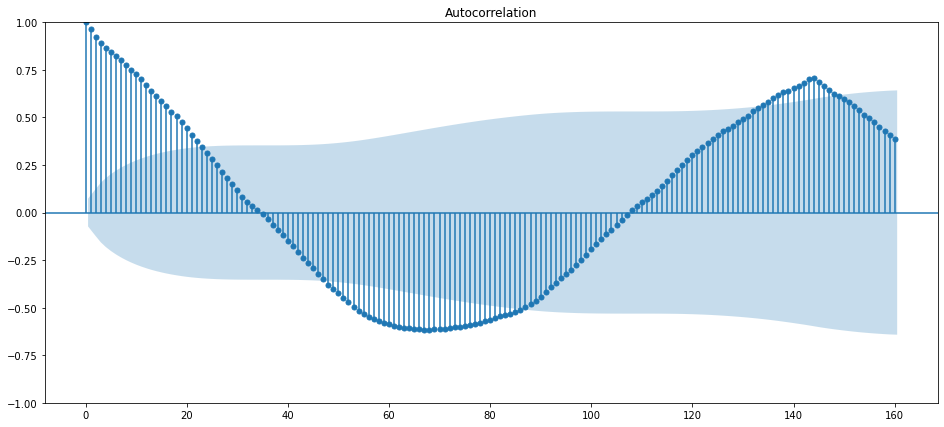

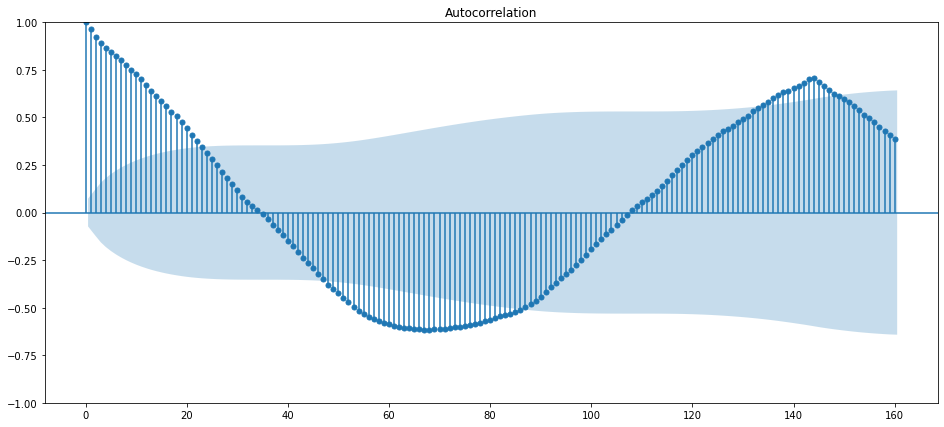

In [23]:
fig, ax = plt.subplots(figsize=(16, 7))
plot_acf(df_1T.kw.values.squeeze(), lags=160, ax=ax)

In [24]:
df_1T['t_scaled'].iloc[55], df_1T['t_scaled'].iloc[80]

(0.07649513212795549, 0.11126564673157163)

In [25]:
df_1T['t_scaled'].iloc[135], df_1T['t_scaled'].iloc[150]

(0.18776077885952713, 0.2086230876216968)

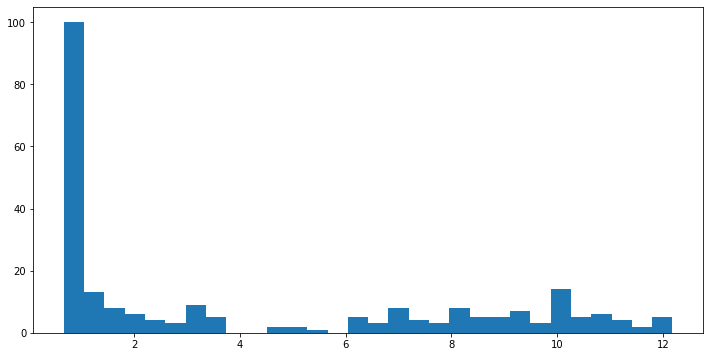

In [8]:
plt.figure(figsize=(12, 6))
plt.hist(x=df_1T.kw, bins=30)
plt.show()